*Alonso Evan*

*06/12/2019*


----------

This notebook aim to train Deep Learning, particularly Neural Networks. I am trying to understand various components of these Artificial Neural Networks ANN. If it could be useful to someone else, I'll would be glad. :)

I am designing Neural Network on MNIST handwritten digits images to identify their correct label i.e number in image. We could called thaht an image recognition task. This data is provided by Kaggle.

You must have guessed its an image recognition task.

1. [Import packages](#1)
1. [Load data](#2)
1. [Preprocessing the digit images](#3)
1. [Data Viz](#4)
1. [Designing Neural Network Architecture](#5)
1. [Compile network](#6)
1. [A quick look at our model's performance](#7)
1. [Submitting our first Predictions to Kaggle](#8)
1. [Adding Batch Normalization](#9)
1. [Submitting our second Predictions to Kaggle](#10)
1. [Data augmentation](#11)
1. [Submitting our third Predictions to Kaggle](#12)

Let's dive into this !

<a id="1"></a> <br>
## Import packages

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(4)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


<a id="2"></a> <br>
## Load Data

In [3]:
train = pd.read_csv("train.csv")
print('Train data size:',train.shape)
train.head()

Train data size: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv("test.csv")
print('Test data size:',test.shape)
test.head()

Test data size: (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="3"></a> <br>
## Data Viz

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

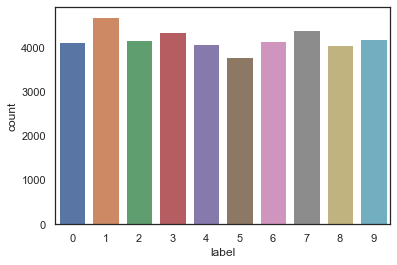

In [5]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)  

del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

The output variable is an integer from 0 to 9. This is a multiclass classification problem.

She seems balanced, nice ! We clearly doesn't need oversampling or undersampling.


Let's see if we have NULL values in our data sets.

In [8]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

It seems there are no NULL values ! That's convenient, but in real case that almost never the case. So watch out for that.

<a id="4"></a> <br>
## Preprocessing the digit images

For a best performance of our model, we need to normalize our pixel (0 to 255) in our x_train and x_test so they could be included into [0:1]. 
Moreover the Convolutional Neural Networks (CNN) converg faster on [0..1] data than on [0..255].

In [6]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

There, we transform our x_train and x_test into 3 dimensions matrix (height = 28px, width = 28px , canal = 1).

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Let's encode our labels with the function to_categorical :

In [8]:
# Encode labels to one hot vectors (ex : 4 -> [0,0,0,0,1,0,0,0,0,0]) with to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)

Let's split our data !

In [9]:
random_seed = 2

# Split the train and the validation set for the fitting

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

Since we have 42 000 training images of balanced labels, a random split of the train set doesn't cause some labels to be over represented in the validation set. Be careful with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation.

To avoid that, you could use stratify = True option in train_test_split function (Only for >=0.17 sklearn versions).

We can get a better sense for one of these examples by visualising the image and looking at the label.

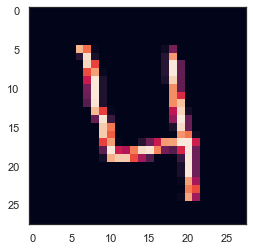

In [9]:
# Some examples
g = plt.imshow(x_train[3][:,:,0])

What a nice 4 !

<a id="5"></a> <br>
## Designing Neural Network Architecture

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

>First let's create a sequential model

>Then let's add two convolutional (Conv2D) layer with the following parameters :

- nb_filter= 32 (filter's number). Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. 
- nb_row= 5 , nb_col= 5, (Each filters have a 5x5 sizes)
- padding = 'same'. It's the kernel filter
- input_shape= (1,28,28) (images sizes, we need to mention it for the first Conv2D)
- activation = 'relu'. 'relu' is the rectifier, the rectifier activation function is used to add non linearity to the network.


>The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. These are used to reduce computational cost, and to also reduce overfitting. We have to choose the pooling size, more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.


>Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their weights to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

Here, we choose to drop 25% of the inputs.

>After, we re use two Conv2D, this time with 64 filters and again a MaxPool2D and a Dropout

>In the end, we use the Flatten layer to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers.  And after the Flatten layer, we add a fully-connected layer, with 256 neurons and the activation function "relu"

>Another Dropout and finally the last fully-connected layer with 10 neurons (for 10 labels in output) and a activation function softmax to return distribution of probability of each class.

The features in two fully-connected (Dense) layers  is just an artificial neural networks (ANN).

This kind of Neural Networks are extremely efficient for image recognition ! Quite slow but we don't have that much data so it's all good.


In [14]:
model = Sequential()



model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id="6"></a> <br>
## Compile network

That's it ! Our layers are added to the model. But before we fit our model, we need to set up the compile method with 3 parameters :

- a loss function, to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy".

- a score function, used to evaluate the model's performance. Here we will use the function "accuracy". This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation). Sometimes, this metric isn't really appropriate but here, i'ts the metric used by Kaggle so let's move on with her !

- an optimisation algorithm (optimizer), it's the most important function. This will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss function.

Here, I will choose RMSprop because it's a very effective optimizer.

In [15]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In order to make our optimizer converge faster and closest to the global minimum of our loss function (categorical_crossentropy), I will use an converging method of the learning rate.

The learning rate is the step by which the optimizer walks through the 'loss landscape'. The higher learning rate, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high learning rate and the optimizer could probably fall into a local minima, which is not especially good. We prefer fall into a global minimum, it's more efficiency !

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high learning rate, we will decrease the learning rate dynamically every X steps (epochs) but only when the accuracy is not enhanced !

With the ReduceLROnPlateau function from Keras.callbacks, I choose to reduce the learning rate by half if the accuracy is not improved after 3 epochs.

In [18]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [19]:
epochs = 30 
batch_size = 86

In [21]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_val, Y_val), verbose = 2, callbacks=[learning_rate_reduction])


Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 121s - loss: 0.2479 - accuracy: 0.9219 - val_loss: 0.0651 - val_accuracy: 0.9776
Epoch 2/30
 - 152s - loss: 0.0741 - accuracy: 0.9782 - val_loss: 0.0581 - val_accuracy: 0.9852
Epoch 3/30
 - 154s - loss: 0.0534 - accuracy: 0.9843 - val_loss: 0.0412 - val_accuracy: 0.9864
Epoch 4/30
 - 154s - loss: 0.0449 - accuracy: 0.9866 - val_loss: 0.0439 - val_accuracy: 0.9876
Epoch 5/30
 - 157s - loss: 0.0408 - accuracy: 0.9878 - val_loss: 0.0310 - val_accuracy: 0.9921
Epoch 6/30
 - 158s - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.0302 - val_accuracy: 0.9912
Epoch 7/30
 - 158s - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0452 - val_accuracy: 0.9905
Epoch 8/30
 - 135s - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0457 - val_accuracy: 0.9905
Epoch 9/30
 - 140s - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0268 - val_accuracy: 0.9936
Epoch 10/30
 - 152s - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0313 - val_accuracy: 0.9910

<a id="7"></a> <br>
## A quick look at our model's performance

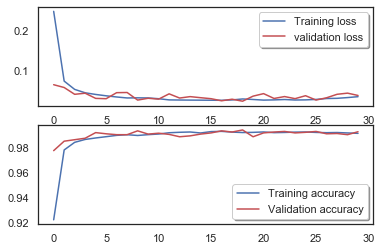

In [26]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

The model reaches almost 100% (99.29+%) accuracy on the validation dataset after 30 epochs. We can see that 30 epoch was too big, I think 5-10 would be enough. The validation accuracy is greater than the training accuracy almost every time during the training. That means that our model does not overfit the training set.

Our model is very well trained !!!

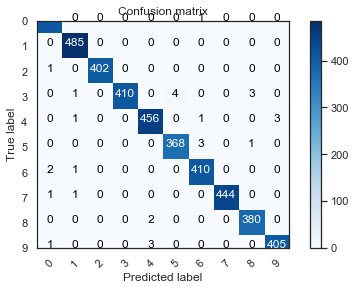

In [27]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

Here we can see that our CNN performs very well on all digits with few errors considering the size of the validation set (4 200 images).

However, it seems that our CNN has some little troubles with the 4 digits, they are misclassified as 6 and 9. Sometime it's very difficult to catch the difference between  4 and 9 when curves are smooth.

<a id="8"></a> <br>
## Submitting our first Predictions to Kaggle

In [ ]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission1 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission1.csv",index=False)

We obtained **0.99042 kaggle submission accuracy**, we are 873 on 2303. Not bad, but not good enough as well. Let's see if we can optimize this.

Let's try our neural network but this time with *BatchNormalization*. It helps to tune hyperparameters much efficiently and train really deep neural networks.

<a id="9"></a> <br>
## Adding Batch Normalization

In [11]:
from keras.layers.normalization import BatchNormalization

In [12]:
model = Sequential()



model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization(axis = 1)),
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis = 1)),
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 1))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

As you can see, I added some lines in my CNN. Let's see if these lines with BatchNormalization will enhanced my performance.

In [13]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [18]:
epochs = 30 
batch_size = 86

In [19]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_val, Y_val), verbose = 2, callbacks=[learning_rate_reduction])

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 229s - loss: 0.0741 - accuracy: 0.9778 - val_loss: 0.0544 - val_accuracy: 0.9852
Epoch 2/30
 - 228s - loss: 0.0538 - accuracy: 0.9837 - val_loss: 0.0410 - val_accuracy: 0.9890
Epoch 3/30
 - 232s - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0476 - val_accuracy: 0.9886
Epoch 4/30
 - 153s - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.0320 - val_accuracy: 0.9893
Epoch 5/30
 - 137s - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0321 - val_accuracy: 0.9907
Epoch 6/30
 - 137s - loss: 0.0320 - accuracy: 0.9902 - val_loss: 0.0360 - val_accuracy: 0.9912
Epoch 7/30
 - 135s - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0247 - val_accuracy: 0.9924
Epoch 8/30
 - 135s - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0453 - val_accuracy: 0.9881
Epoch 9/30
 - 132s - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0328 - val_accuracy: 0.9926
Epoch 10/30
 - 132s - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0289 - val_accuracy: 0.9929


It's much longer than without BatchNormalization. I would recommend to use it with the appropriate computer if you train it on huge database (and it's almost always the case in real life). Otherwise, it'll took forever.

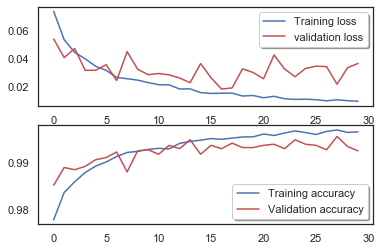

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Hmm our model seems to overfit. But just a little. 

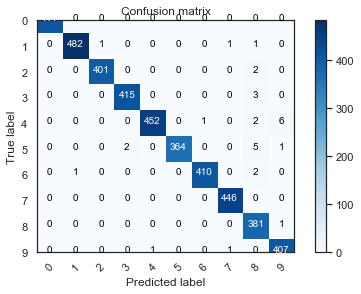

In [21]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

<a id="10"></a> <br>
## Submitting our second Predictions to Kaggle

In [22]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [23]:
submission2 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission2.to_csv("submission2.csv",index=False)

This new model give me *0.99157* instead of 0.99042. It's not much but at this point, it's huge ! I advanced 108 places on the leaderboard, nice !
But can I do better again ? Let's see.

<a id="11"></a> <br>
## Data augmentation

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make the existing kaggle dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.


Approches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model. Let's try !

For the data augmentation, I choosed to :

- Randomly rotate some training images by 8 degrees
- Randomly Zoom by 0.8% some training images
- Randomly shift images horizontally by 10% of the width
- Randomly shift images vertically by 10% of the height
I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [25]:
datagen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,  width_shift_range=0.1, 
                            height_shift_range=0.1, zoom_range=0.08)

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 144s - loss: 0.0851 - accuracy: 0.9796 - val_loss: 0.0319 - val_accuracy: 0.9921
Epoch 2/30
 - 184s - loss: 0.0541 - accuracy: 0.9850 - val_loss: 0.0241 - val_accuracy: 0.9943
Epoch 3/30
 - 254s - loss: 0.0537 - accuracy: 0.9858 - val_loss: 0.0312 - val_accuracy: 0.9936
Epoch 4/30
 - 253s - loss: 0.0492 - accuracy: 0.9858 - val_loss: 0.0267 - val_accuracy: 0.9933
Epoch 5/30
 - 253s - loss: 0.0446 - accuracy: 0.9871 - val_loss: 0.0198 - val_accuracy: 0.9938
Epoch 6/30
 - 252s - loss: 0.0445 - accuracy: 0.9874 - val_loss: 0.0240 - val_accuracy: 0.9933
Epoch 7/30
 - 253s - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.0203 - val_accuracy: 0.9933
Epoch 8/30
 - 253s - loss: 0.0400 - accuracy: 0.9894 - val_loss: 0.0220 - val_accuracy: 0.9945
Epoch 9/30
 - 253s - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0285 - val_accuracy: 0.9929
Epoch 10/30
 - 251s - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0261 - val_accuracy: 0.9938
Epoch 11/30
 - 251s - loss: 0.0342 - accuracy: 0.

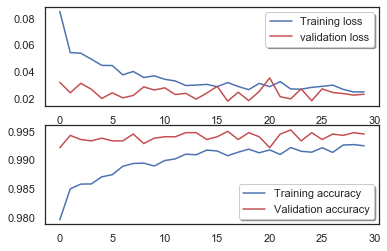

In [26]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

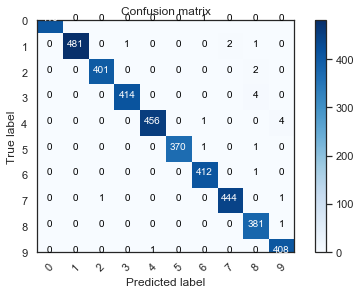

In [27]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

<a id="12"></a> <br>
## Submitting our third Predictions to Kaggle

In [28]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [29]:
submission3 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission3.to_csv("submission3.csv",index=False)

This new model give me *0.99414* instead of 0.99157 (525 on 2302). Huge improvement ! I advanced 240 places on the leaderboard, nice ! 
I will stop there for the moment but maybe later I'd try harder and explore things more deeply. We shall see. 